In [4]:
import numpy as np
import seaborn as sns
from imageio.v3 import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Franke's function

In [3]:
# franke

# Real terrain data
Visualize the terrain data, inspect differences.

In [11]:
def plot_terrain(filename, place):
    # Load Oslo terrain
    terrain = imread(filename)
    # Show the terrain
    fig, ax = plt.subplots()
    ax.set_title(place)
    ax.imshow(terrain, cmap='gray')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

def plot_terrain_surf(x1, x2, y, save=False):
    c = sns.diverging_palette(145, 300, s=60, as_cmap=True)
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    surf = ax.plot_surface(x1, x2, y, cmap=c, linewidth=0, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


def create_terrain_data(filename, N, scaled=False):
    data = f'../data/{filename}'
    terrain = imread(data)

	# Create y of given data points
    y = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            y[i, j] = terrain[i, j]

	# Create x1 and x2
    x1_ = np.sort(np.random.uniform(0, 1, N))
    x2_ = np.sort(np.random.uniform(0, 1, N))
    x1, x2= np.meshgrid(x1_, x2_)

    if scaled:
        y = y.ravel()
        y_scaled = (y - y.mean()) / y.std()
        return (x1, x2, y_scaled)
	
    else:
        return (x1, x2, y)



### Oslo 

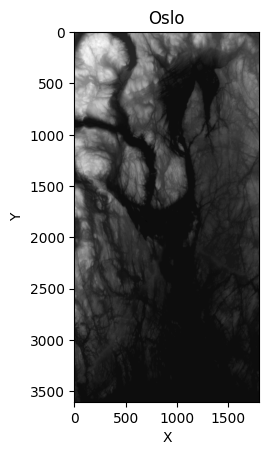

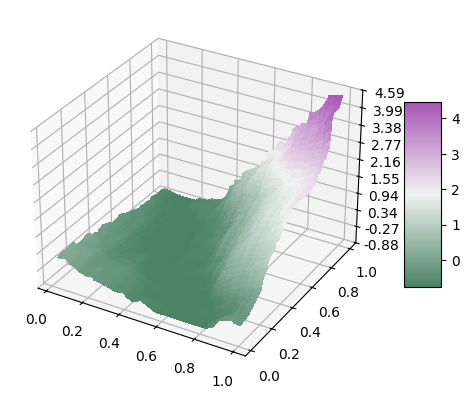

In [16]:

# Filename
oslo = '../data/n59_e010_1arc_v3.tif'
plot_terrain(oslo, 'Oslo')
x1, x2, y = create_terrain_data(oslo, 100, True)
y = y.reshape(-1, 100)
plot_terrain_surf(x1, x2, y)


### China

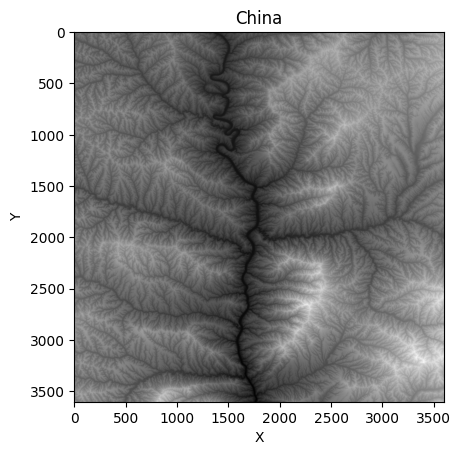

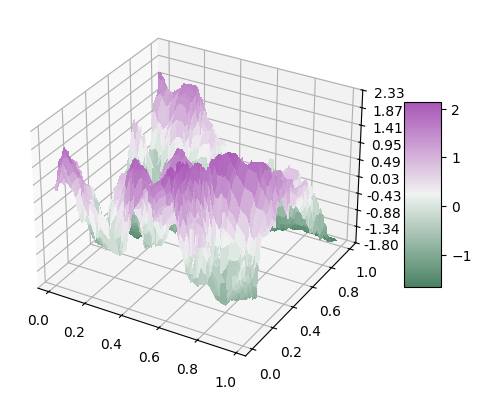

In [17]:
# Filename
china = '../data/n36_e110_1arc_v3.tif'
plot_terrain(china, 'China')
x1, x2, y = create_terrain_data(china, 100, True)
y = y.reshape(-1, 100)
plot_terrain_surf(x1, x2, y)

### Nepal

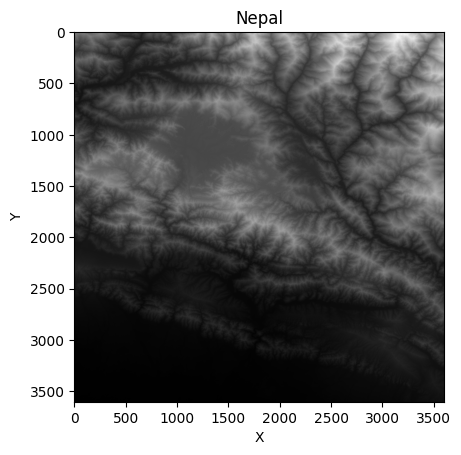

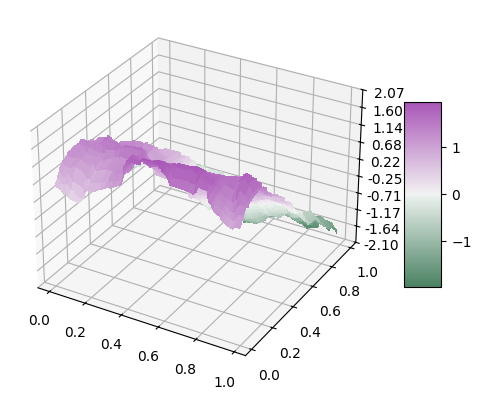

In [18]:
# Filename
nepal = '../data/n27_e085_1arc_v3.tif'
plot_terrain(nepal, 'Nepal')
x1, x2, y = create_terrain_data(nepal, 100, True)
y = y.reshape(-1, 100)
plot_terrain_surf(x1, x2, y)

### Japan

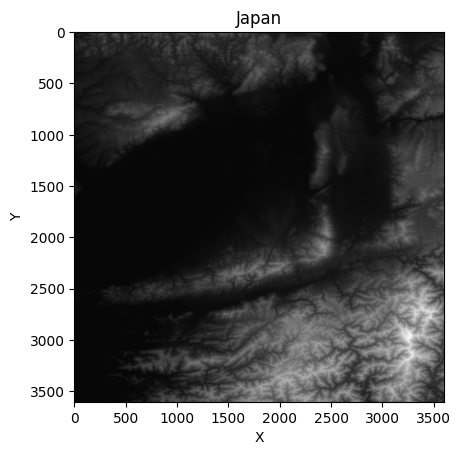

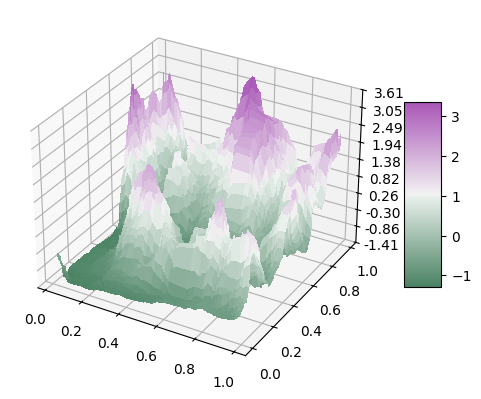

In [19]:
# Filename
japan = '../data/n34_e135_1arc_v3.tif'
plot_terrain(japan, 'Japan')
x1, x2, y = create_terrain_data(japan, 100, True)
y = y.reshape(-1, 100)
plot_terrain_surf(x1, x2, y)

### Egypt

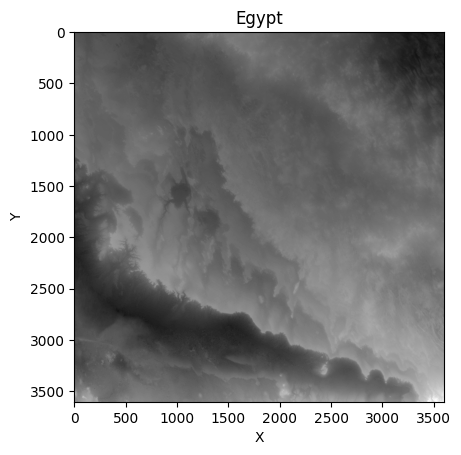

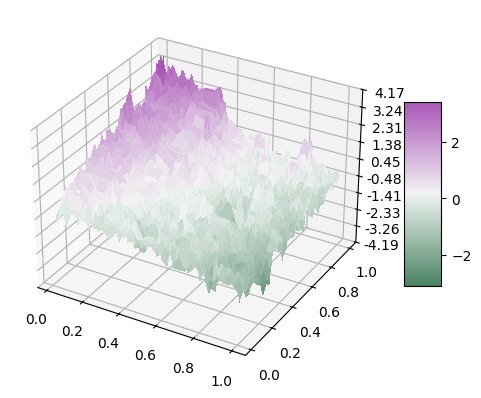

In [20]:
# Filename
egypt = '../data/n26_e029_1arc_v3.tif'
plot_terrain(egypt, 'Egypt')
x1, x2, y = create_terrain_data(egypt, 100, True)
y = y.reshape(-1, 100)
plot_terrain_surf(x1, x2, y)

In [16]:
from sklearn.discriminant_analysis import StandardScaler


def create_terrain_data(filename, N, scaled=False):
	"""Load terrain data from file and create input and output arrays.
	
	Args:
        filename (str): filename to import data from
		N (int): number of rows and columns to use from terrain
		
	Returns:
        tuple: arrays of input and terrain data
	"""
	data = f"../data/{filename}"
	terrain = imread(data)

	# Create y of given data points
	y = np.zeros((N, N))
	for i in range(N):
		for j in range(N):
			y[i, j] = terrain[i, j]

	# Create x1 and x2
	x1_ = np.sort(np.random.uniform(0, 1, N))
	x2_ = np.sort(np.random.uniform(0, 1, N))
	x1, x2= np.meshgrid(x1_, x2_)

	if scaled:
		y = y.ravel()
		y_scaled = (y - y.mean()) / y.std()
		return (x1, x2, y_scaled.reshape(-1, N))
	
	else:
		return (x1, x2, y.reshape(-1, N))

In [17]:
# create_terrain_data("n34_e135_1arc_v3.tif", 100, scaled=True)
x1, x2, y = create_terrain_data("n34_e135_1arc_v3.tif", 100, scaled=True)